# covid-19 death risk analysis 
The dataset was provided by the Mexican government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

Downloaded from [Kaggle.com](https://www.kaggle.com/datasets/meirnizri/covid19-dataset).


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('covid.csv')

In [56]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED,IS_FEMALE
0,2,1,1,97,1,65,2,2,2,2,...,1,2,2,2,2,2,3,97,1,1
1,2,1,1,97,1,72,97,2,2,2,...,1,2,2,1,1,2,5,97,1,0
2,2,1,2,1,2,55,97,1,2,2,...,2,2,2,2,2,2,3,2,1,0
3,2,1,1,97,2,53,2,2,2,2,...,2,2,2,2,2,2,7,97,1,1
4,2,1,1,97,2,68,97,1,2,2,...,1,2,2,2,2,2,3,97,1,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   PATIENT_TYPE          1048575 non-null  int64
 3   INTUBED               1048575 non-null  int64
 4   PNEUMONIA             1048575 non-null  int64
 5   AGE                   1048575 non-null  int64
 6   PREGNANT              1048575 non-null  int64
 7   DIABETES              1048575 non-null  int64
 8   COPD                  1048575 non-null  int64
 9   ASTHMA                1048575 non-null  int64
 10  INMSUPR               1048575 non-null  int64
 11  HIPERTENSION          1048575 non-null  int64
 12  OTHER_DISEASE         1048575 non-null  int64
 13  CARDIOVASCULAR        1048575 non-null  int64
 14  OBESITY               1048575 non-null  int64
 15  RENAL_CHRONIC  

## Understanding and cleaning the data

### Helpers

In [75]:
def plot_hist_col(col: str, title: str) -> None:
  plt.title(title)
  sns.histplot(data=df, x=col, bins=30, kde=True,)
  plt.show()

In [82]:
def plot_col_deaths_hist(label: str) -> None:
    plt.hist(df[df["DIED"] == 1][label], color="red", label="died", alpha=0.7, density=True)
    plt.hist(df[df["DIED"] == 0][label], color="green", label="not died", alpha=0.7, density=True)
    plt.legend()
    plt.show()

### Column `DATE_DIED`

If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [22]:
df['DATE_DIED'].describe()

count        1048575
unique           401
top       9999-99-99
freq          971633
Name: DATE_DIED, dtype: object

In [23]:
df['DIED'] = df['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)
df.drop(labels='DATE_DIED', axis=1, inplace=True)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


In [54]:
def plot_deaths():
  labels=['undead', 'dead']
  data = [
      len(df[df['DIED'] == 0]),
      len(df[df['DIED'] == 1])
  ]
  colors = sns.color_palette('pastel')[2:4]
  plt.figure(figsize=(7,7))
  plt.title('the percentage of deaths in the dataset')
  plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
  plt.show()

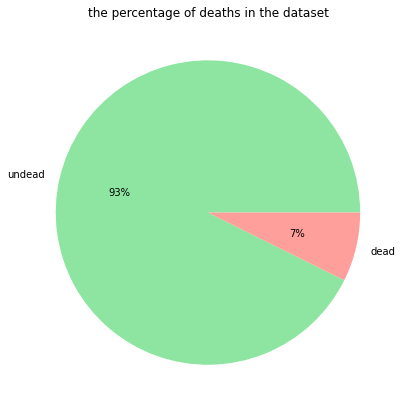

In [55]:
plot_deaths()

### Column `SEX`
1 for female and 2 for male

In [24]:
df['SEX'].value_counts(dropna=False)

1    525064
2    523511
Name: SEX, dtype: int64

In [25]:
df['IS_FEMALE'] = df['SEX'].apply(lambda x: 0 if x == 2 else 1)
df.drop(labels='SEX', axis=1, inplace=True)
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED,IS_FEMALE
0,2,1,1,97,1,65,2,2,2,2,...,1,2,2,2,2,2,3,97,1,1
1,2,1,1,97,1,72,97,2,2,2,...,1,2,2,1,1,2,5,97,1,0
2,2,1,2,1,2,55,97,1,2,2,...,2,2,2,2,2,2,3,2,1,0
3,2,1,1,97,2,53,2,2,2,2,...,2,2,2,2,2,2,7,97,1,1
4,2,1,1,97,2,68,97,1,2,2,...,1,2,2,2,2,2,3,97,1,0


In [65]:
df[df['DIED'] == 1].groupby(['IS_FEMALE'])['IS_FEMALE'].count()

IS_FEMALE
0    49540
1    27402
Name: IS_FEMALE, dtype: int64

**Observation:** women die less frequently.

### Column `AGE`

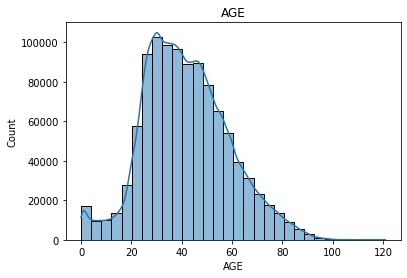

In [76]:
plot_hist_col('AGE', 'AGE')

**Observation:** The dataset mostly consists of people between 25 and 50 years old.

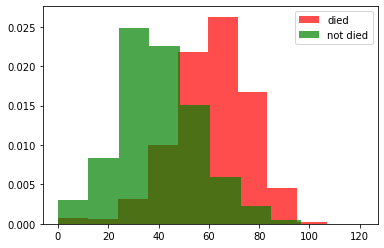

In [84]:
plot_col_deaths_hist('AGE')

**Observation:** People older than 50, are at risk.

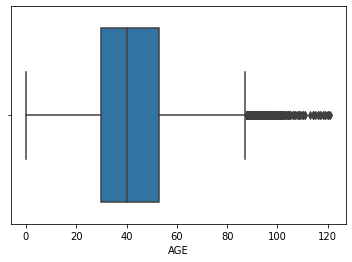

In [92]:
sns.boxplot(data=df, x="AGE", hue="DIED", )
plt.show()